# Сборный проект: Обучение с учителем: качество модели

В данном проекте нам предстоит решить задачу классификации, чтобы помочь бизнесу, а именно разработать решение, которое позволит персонализировать предложения постоянным клиентам, чтобы увеличить их покупательскую активность.<br/><br/>
**Суть исследования:** на основе имеющегося датафрейма построить модель предсказания целевого признака: Покупательская активность, учитывая данные о предпочтениях пользователей и их взаимодействия с сайдом магазина.<br/><br/>
**Задачи исследования:** изучить и обработать входные данные, подготовить их для работы с моделями машинного обучения, подобрать лучшую и самую подходящую под нашу задачу модель. А так же предложить бизнесу решения, которые приведут к повышению прибыли. <br/><br/>
**Исходные данные:** на входе имеем 4 датафрейма с данными об активности пользователей:
* датафрейм с данными о поведении покупателя на сайте - market_file.csv
* датафрейм с данными о выручке, которую получает магазин с покупателя - market_money.csv
* датафрейм с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. - market_time.csv
* датафрейм с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю - money.csv

**Данное исследование будет идти по такому плану:**<br/>
* обзор данных
* предобработка данных
* исследовательский анализ данных
* объединение таблиц
* корреляционный анализ всех признаков
* работа с пайплайном
* анализ важности признаков
* сегментация покупателей
* общие выводы из работы и рекомендации

In [1]:
#импорты
!pip install seaborn==0.13.2 -q
!pip install --upgrade matplotlib -q
import pandas as pd
import warnings
warnings.simplefilter("ignore") 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st

!pip install scikit-learn==1.4.0
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

!pip install phik -q
import phik
from phik.report import plot_correlation_matrix

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
!pip install shap==0.45.1 -q
import shap

     |████████████████████████████████| 12.1 MB 1.2 MB/s eta 0:00:01
     |████████████████████████████████| 301 kB 116.1 MB/s eta 0:00:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
      Successfully uninstalled scikit-learn-0.24.1


### Шаг.  Загрузка данных

In [2]:
#создадим 4 датасета и загрузим в них исходные датафремы
df_m_file = pd.read_csv('/datasets/market_file.csv', sep=',')
df_m_money = pd.read_csv('/datasets/market_money.csv', sep=',')
df_m_time = pd.read_csv('/datasets/market_time.csv', sep=',')
df_money = pd.read_csv('/datasets/money.csv', sep=';')


#выведем несколько строк и проверим какие данные в них содержатся, а также выведем информацию о датафрейме
display(df_m_file.tail(30))
print(df_m_file.info())
print()
display(df_m_money.head(6))
print(df_m_money.info())
print()
display(df_m_time.head(6))
print(df_m_time.info())
print()
display(df_money.head(6))
print(df_money.info())
print()

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
1270,216618,Прежний уровень,премиум,да,4.3,4,983,0.16,Товары для детей,4,4,2,5
1271,216619,Прежний уровень,стандарт,нет,3.9,4,140,0.17,Техника для красоты и здоровья,4,2,8,11
1272,216620,Прежний уровень,стандарт,да,6.1,4,1001,0.17,Товары для детей,3,5,6,19
1273,216621,Прежний уровень,стандарт,нет,6.6,5,612,0.25,Товары для детей,5,0,8,5
1274,216622,Прежний уровень,премиум,да,4.1,3,162,0.16,Товары для детей,4,5,3,8
1275,216623,Прежний уровень,стандарт,да,3.4,4,663,0.22,Кухонная посуда,3,0,2,10
1276,216624,Прежний уровень,стандарт,да,5.4,5,806,0.17,Домашний текстиль,6,1,8,11
1277,216625,Прежний уровень,стандарт,да,3.4,5,351,0.24,Кухонная посуда,5,1,6,8
1278,216626,Прежний уровень,премиум,да,3.9,4,488,0.32,Домашний текстиль,2,5,3,8
1279,216627,Прежний уровень,премиум,да,2.4,4,768,0.23,Товары для детей,3,5,2,18


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   Покупательская активность            1300 non-null   object 
 2   Тип сервиса                          1300 non-null   object 
 3   Разрешить сообщать                   1300 non-null   object 
 4   Маркет_актив_6_мес                   1300 non-null   float64
 5   Маркет_актив_тек_мес                 1300 non-null   int64  
 6   Длительность                         1300 non-null   int64  
 7   Акционные_покупки                    1300 non-null   float64
 8   Популярная_категория                 1300 non-null   object 
 9   Средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  Неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  Ошибка_сервиса                

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   Период   3900 non-null   object 
 2   Выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB
None



,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10
3,215349,предыдцщий_месяц,12
4,215350,текущий_месяц,13
5,215350,предыдцщий_месяц,8


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   Период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB
None



,id,Прибыль
0,215348,"0,98"
1,215349,"4,16"
2,215350,"3,13"
3,215351,"4,87"
4,215352,"4,21"
5,215353,"3,95"


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   id       1300 non-null   int64 
 1   Прибыль  1300 non-null   object
dtypes: int64(1), object(1)
memory usage: 20.4+ KB
None



Мы вывели по несколько строчек из каждого датафрейма, просмотрели и изучили общую информацию по каждому из них. Исходя из этого можно сделать следующие выводы: 
* датафремы содержат данные, которые и должны в них содержаться. Содержание соответствуют названию
* отсутствуют пропуски значений, во всех столбцах одинаковое количество данных
* дробные числа разделены запятой, а не точкой. Это надо будет исправить
* типы данных соответствуют действительным 
<br/>

Также в дальнейшем сделаем проверку на дубликаты.

### Шаг. Предобработка данных
#### Преобразование 

Типы данных оставлю такие же, какие были изначально. Названия столбцов тоже переименовывать не будем, оставим на русском языке.

In [3]:
#заменим в датафрейме df_money запятые на точки в числах
df_money['Прибыль'] = df_money['Прибыль'].str.replace(',', '.').astype('float64')

Бинарный столбец Разрешить_сообщить было принято решение оставить так как есть, потому что в дальнейшем все равно все столбцы будут кодироваться при подготовке данных для обучения модели.

#### Проверка наличия явных дубликатов

In [4]:
print(df_m_file.duplicated().sum())
print(df_m_money.duplicated().sum())
print(df_m_time.duplicated().sum())
df_money.duplicated().sum()


0
0
0


0

Явных дубликатов не обнаружено

#### Проверка наличия неявных дубликатов
Для избежания неточностей в названиях хочется проверить списки уникальных значений, в столбцах с типами object

In [5]:
#дадим имена нашим датафреймам чтобы использовать их как определитель, с каким из файлом мы сейчас работаем
df_m_file.__name__ = 'df_m_file'
df_m_money.__name__ = 'df_m_money'
df_m_time.__name__ = 'df_m_time'
df_money.__name__ = 'df_money'

df_list = [df_m_file, df_m_money, df_m_time, df_money]
#переберем все наши датафреймы в цикле

for df in df_list:
# Выберем все столбцы, которые имеют тип данных 'object' и после выведем списки их уникальных значений
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Цикл for для вывода списков уникальных значений по каждому категориальному столбцу
    print(f"Информация по датафрейму '{df.__name__}':\n")
    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения для столбца '{column}': {unique_values}")
    print()

Информация по датафрейму 'df_m_file':

Уникальные значения для столбца 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Уникальные значения для столбца 'Тип сервиса': ['премиум' 'стандартт' 'стандарт']
Уникальные значения для столбца 'Разрешить сообщать': ['да' 'нет']
Уникальные значения для столбца 'Популярная_категория': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Информация по датафрейму 'df_m_money':

Уникальные значения для столбца 'Период': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

Информация по датафрейму 'df_m_time':

Уникальные значения для столбца 'Период': ['текущий_месяц' 'предыдцщий_месяц']

Информация по датафрейму 'df_money':




Мы сделали проверку не зря:
* в столбце Тип сервиса встречается опечатка в названии типа
* в столбце Период датафрейма df_m_time опечатка в указании месяца

Теперь надо это исправить.

In [6]:
df_m_file['Тип сервиса'] = df_m_file['Тип сервиса'].str.replace('стандартт', 'стандарт')
df_m_time['Период'] = df_m_time['Период'].str.replace('предыдцщий_месяц', 'предыдущий_месяц')

In [7]:
#проверим еще раз называния во всех датафреймах
for df in df_list:
# Выберем все столбцы, которые имеют тип данных 'object' и после выведем списки их уникальных значений
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()
# Цикл for для вывода списков уникальных значений по каждому категориальному столбцу
    print(f"Информация по датафрейму '{df.__name__}':\n")
    for column in categorical_columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения для столбца '{column}': {unique_values}")
    print()

Информация по датафрейму 'df_m_file':

Уникальные значения для столбца 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Уникальные значения для столбца 'Тип сервиса': ['премиум' 'стандарт']
Уникальные значения для столбца 'Разрешить сообщать': ['да' 'нет']
Уникальные значения для столбца 'Популярная_категория': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Техника для красоты и здоровья' 'Кухонная посуда'
 'Мелкая бытовая техника и электроника']

Информация по датафрейму 'df_m_money':

Уникальные значения для столбца 'Период': ['препредыдущий_месяц' 'текущий_месяц' 'предыдущий_месяц']

Информация по датафрейму 'df_m_time':

Уникальные значения для столбца 'Период': ['текущий_месяц' 'предыдущий_месяц']

Информация по датафрейму 'df_money':




In [8]:
#после этих манипуляций еще раз убедимся что у нас не появились явные дубликаты
print(df_m_file.duplicated().sum())
print(df_m_money.duplicated().sum())
print(df_m_time.duplicated().sum())
df_money.duplicated().sum()


0
0
0


0

Теперь данные в порядке. Были устранены опечатки и несхождения в колонках с текстовыми данными, они все приведены к одному виду. Пропусков в данных не было. <br/>
Было подмечено, что во всех датафреймах одинаковое количество id в колонке с id, просто где-то 1300, а где то увеличенное в 2 или 3 раза, из-за надобности. Следовательно, в дальнейшем объединение столбцов не будет затруднено, мы сможем объединить все датафреймы по колонке id.

### Шаг. Исследовательский анализ данных
#### Проведем статистический анализ данных всех признаков для каждого датасета <br/>

In [9]:
# выведем общую статистику для каждого датафрема и для его численных столбцов

for df in df_list:
# Выберем все столбцы, которые имеют тип данных 'object' и после выведем списки их уникальных значений
    num_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
    #исключим столбец id из результатов
    if 'id' in num_columns:
        num_columns.remove('id')
# Цикл for для вывода списков уникальных значений по каждому категориальному столбцу
    print(f"Информация по датафрейму '{df.__name__}':")
    display(df.loc[:, num_columns].describe())
    print()


Информация по датафрейму 'df_m_file':


,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000



Информация по датафрейму 'df_m_money':


,Выручка
count,3900.000000
mean,5025.696051
std,1777.704104
min,0.000000
25%,4590.150000
50%,4957.500000
75%,5363.000000
max,106862.200000



Информация по датафрейму 'df_m_time':


,минут
count,2600.000000
mean,13.336154
std,4.080198
min,4.000000
25%,10.000000
50%,13.000000
75%,16.000000
max,23.000000



Информация по датафрейму 'df_money':


,Прибыль
count,1300.000000
mean,3.996631
std,1.013722
min,0.860000
25%,3.300000
50%,4.045000
75%,4.670000
max,7.430000


Мы вывели статистические данные по всем столбцам и численным признакам в них, но в таком виде это интерпретировать довольно сложно. Просто цифры нам мало что скажут, тем более если это первое знакомство с данными. <br/>
Для категориальных признаков выведем круговые диаграммы с процентным соотношением признаков. А для количественных построим гистаграммы и диаграммы "ящики с усами"

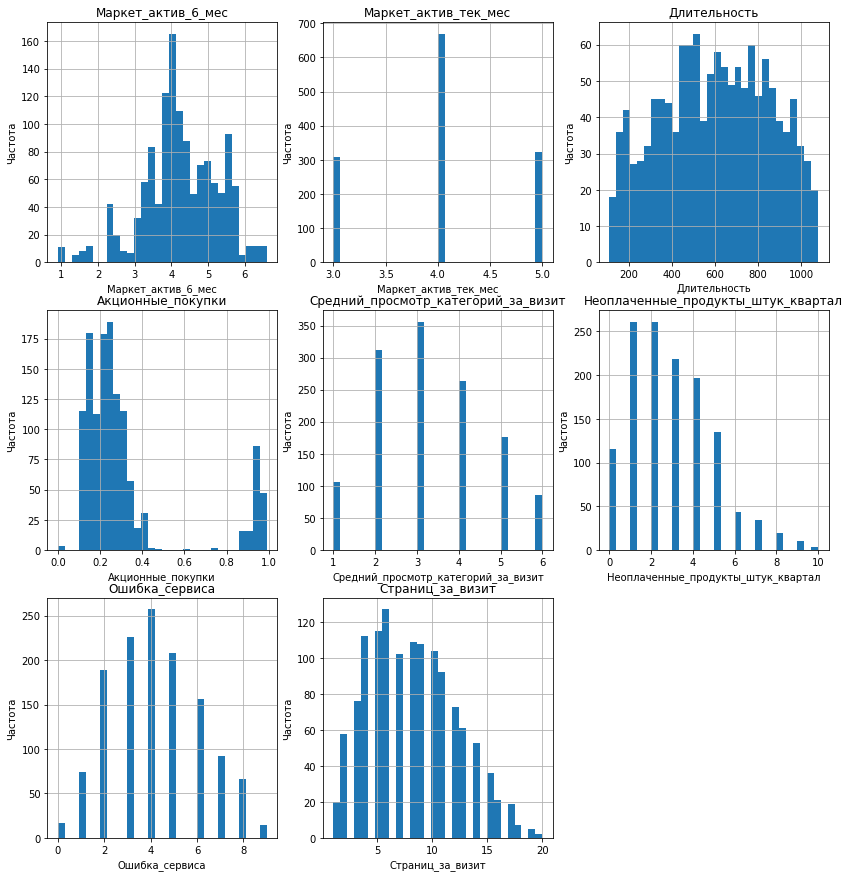

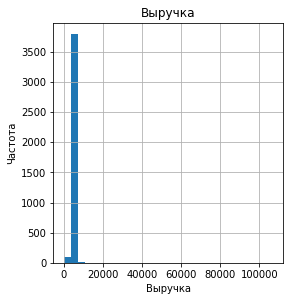

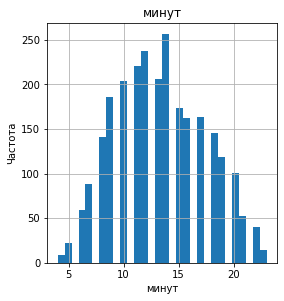

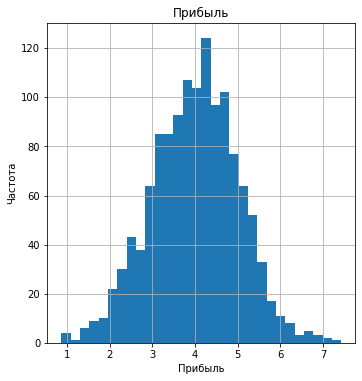

In [10]:
#начнем с количественных переменных
# выведем графики для каждого датафрема и для его численных столбцов

for df in df_list:
# Выберем все столбцы, которые имеют тип данных 'object' и после выведем списки их уникальных значений
    
    num_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
    #исключим столбец id из результатов
    if 'id' in num_columns:
        num_columns.remove('id')
        
    plt.figure(figsize=(14, 15))
    for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(3, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
        df[column].hist(bins=30)
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

Теперь все более наглядно видно. Можно сделать выводы о распределении значений, исходя из графиков. Большинство из них распределены нормальным образом, либо распределением Пуассона. Пара графиков немного странно вывелись, но надеюсь что графики "яшик с усами" помгут лучше рассмотреть эти признаки. <br/>
Выведем теперь боксплоты для всех тех же признаков, и так же рассмотрим данные на выбросы


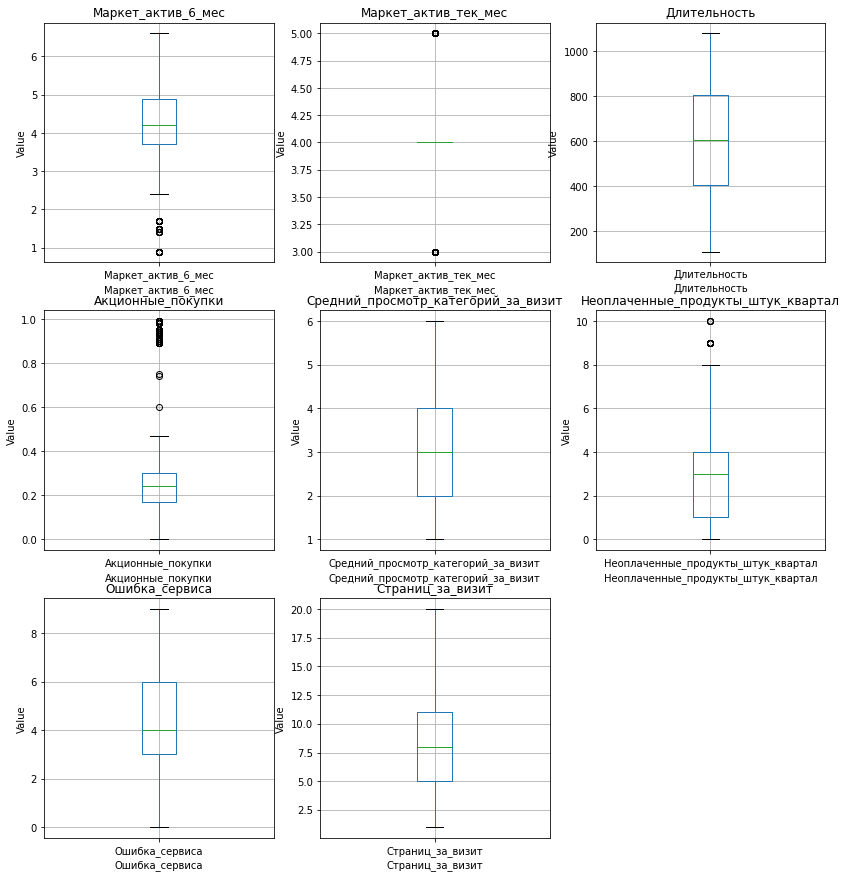

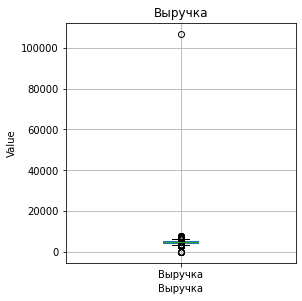

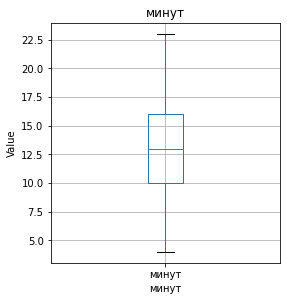

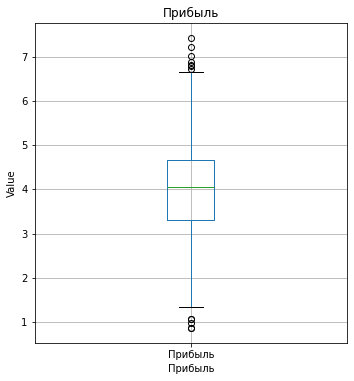

In [11]:
for df in df_list:
# Выберем все столбцы, которые имеют тип данных 'object' и после выведем списки их уникальных значений
    
    num_columns = df.select_dtypes(include=['float64','int64']).columns.tolist()
    #исключим столбец id из результатов
    if 'id' in num_columns:
        num_columns.remove('id')
        
    plt.figure(figsize=(14, 15))
    for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(3, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим график размаха для текущего столбца
        df.boxplot(column=column, ax=plt.gca())
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Value')
        
plt.tight_layout()
plt.show()


Пара графиков снова отобразилась некорректно. Это признаки Маркет_актив_месяц и Выручка. Это произошло потому что в Маркет_актив_месяц довольно мало разных значений, а в столбце Выручка есть явный выброс. Удалим его и посмотрим графики снова.


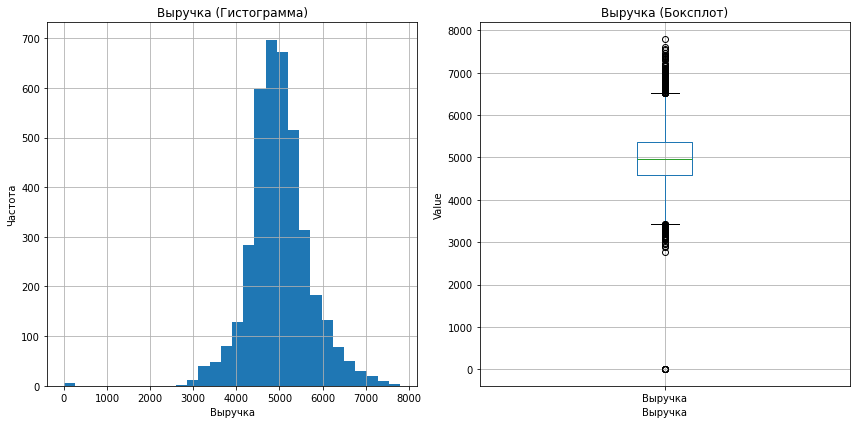

In [12]:
df_m_money = df_m_money.loc[df_m_money['Выручка'] < 20000]

# Создание фигуры и двух подграфиков
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Построение гистограммы на первом подграфике
df_m_money['Выручка'].hist(bins=30, ax=ax1)
ax1.set_title('Выручка (Гистограмма)')
ax1.set_xlabel('Выручка')
ax1.set_ylabel('Частота')

# Построение боксплота на втором подграфике
df_m_money.boxplot(column='Выручка', ax=ax2)
ax2.set_title('Выручка (Боксплот)')
ax2.set_xlabel('Выручка')
ax2.set_ylabel('Value')

plt.tight_layout()  # Улучшает читаемость графика
plt.show()

Теперь графики можно рассмотреть, и увидеть, что выручка так же распределена видом близко к нормальному. На боксплоте видны выбросы, о удалять их пока не будем. Все таки выручка в реальной жизни может быть как сильно больше, так и меньше. <br/>
В целом данные распределены адекватно, явно сильных выбросов больше не наблюдается. Можно сделать вывод что с численными признаками в данных теперь все в порядке<br/><br/>
Настала очередь категориальных переменных. Выведем круговые диаграммы, чтобы посмотреть в каком процентном соотношении встречаются данный каждой категории. По всем датафреймам.

Круговые диаграммы для всех категориальных переменных:



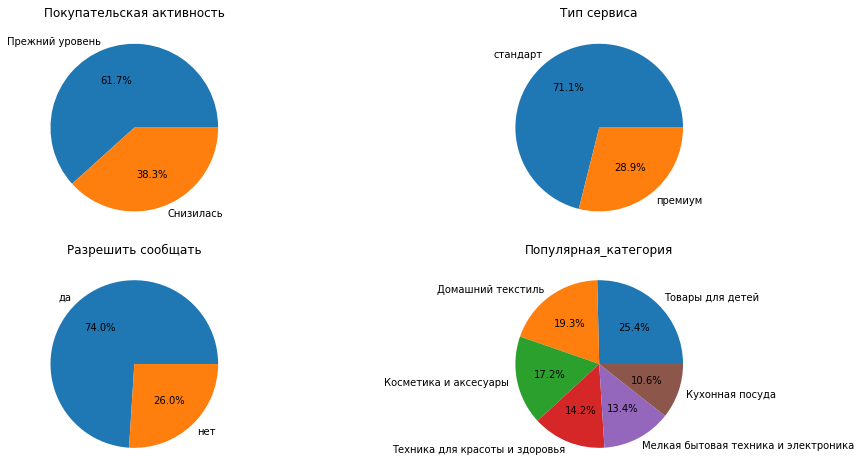

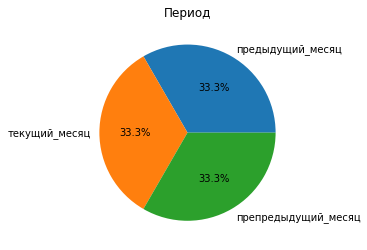

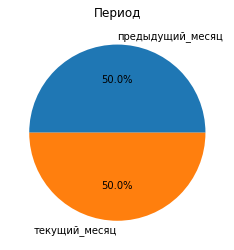

<Figure size 1008x720 with 0 Axes>

In [13]:
print('Круговые диаграммы для всех категориальных переменных:\n')

# Цикл для итерации по каждому датафрейму в списке
for df in df_list:
    plt.figure(figsize=(14, 10))
    
    # Получаем список категориальных столбцов для текущего датафрейма
    categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

    # Цикл для итерации по каждому категориальному столбцу
    for i, column in enumerate(categorical_columns):
        # Создаем subplot для текущего столбца
        plt.subplot(3, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
        # Подсчитываем количество каждого уникального значения в текущем столбце
        data = df[column].value_counts()
    
        # Строим круговую диаграмму для текущего столбца
        plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
        # Добавляем заголовок с названием столбца
        plt.title(column)

    # Отображаем все круговые диаграммы для текущего датафрейма
    plt.tight_layout()
    plt.show()

Мы получили круговые диаграммы для всех категориальных признаков из всех датафреймов, кроме df_money, так как там нет категориальных переменных. Можно явно заметить, что данные распределены неравномерно, а скорее даже почти 1 к 3 в таких категориях как: Покупательская активность, Тип Сервиса и Разрешать сообщать. При дальнейшей работе с этими данными надо будет быть внимательнее к тому, что признаки представлены неравномерно. <br/>
В остальных случаях, признаки представлены равномерно.

#### Отбор клиентов с покупательской активностью не менее 3 месяцев. 
В дальнейшем исследовании лучше всего будет проводить обучение моделей только на данных о пользователях, которые покупали что-то в последнее время, а именно в последние 3 месяца. Данные о покупках именно за последние 3 месяца указаны только в 1 датафрейме -df_m_money. Там указан временный промежуток "препредыдущий_месяц". Делать выводы будем по этому датафрейму.  

In [14]:
#выведем те строчки, в которых выручка равна
df_m_money[df_m_money['Выручка'] == 0]

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
2,215348,предыдущий_месяц,0.0
28,215357,препредыдущий_месяц,0.0
29,215357,предыдущий_месяц,0.0
34,215359,предыдущий_месяц,0.0
35,215359,препредыдущий_месяц,0.0


In [15]:
#мы получили 3 айди, у которых встречались нулевая выручка в последние 3 месяца. Исключим их из общего датафрейма 
id_to_drop = [215348, 215357, 215359]
df_m_money = df_m_money[df_m_money['Выручка'] > 0]
#c этими данными мы будем работать в дальнейшем

**Вывод после исследовательского анализа:** Мы провели статистический анализ для всех признаков из 4 датафреймов, а так же вывели соответствующие графики, учитывая тип каждой из переменных. Был замечен 1 сильный выброс и удален. Остальные выбросы были сочтены за некретичные и данные остались в том виде, в каком и были. <br/>
При анализе колличественных переменных были выведены гистограммы распределений этих значений. Было замечено, что:
* распределение большинства признаков стремиться к нормальному
* оставшаяся небольшая часть имеет вид распределения Пуассона

Чтобы улучшить данные можно полностью исключить все выбросы, которые мы могли заметить на диаграммах ящика с усами, но тогда это будет выброшен довольно значимый процент данных. <br/>
При анализе категориальных переменных было выявлено, что большинство из них представлены в датафрейме в равных пропорциях, а некоторые близки к соотношению 1:3. С ними будем работать внимательнее, учитывая эту особенность.<br/>
Так же мы удалили из датафреймов информацию о пользователях, у которых встречалась Выручка = 0 в течении последних 3 месяцев. Мы не будем рассматривать этих покупателей в дальнейшем и после объединния таблиц в одну удалим данные об этих пользователях из нового общего датафрейма.

### Шаг. Объединение таблиц
#### Объедините таблицы market_file.csv, market_money.csv, market_time.csv. 

Заметим, что в самом большом датафрейме у нас всего 1300 строк, равное количеству id. В датафрейме с выручкой market_money - 3600 строк, потому что для каждого пользователя указывалось 3 разных периода. А в датафрейме с временем на сайте market_time - 2600 строк, по 2 периода на каждого пользователя. <br/>
Просто так мы их объединить не сможем, так как надо привести 2 остальных датафрейма к такому же количеству строк, сделав отдельные колонки по каждому из периодов. Для начала преобразуем сами датафреймы, а потом уже объединим их с основным.

In [16]:
df_m_money

,id,Период,Выручка
1,215348,текущий_месяц,3293.1
3,215349,препредыдущий_месяц,4472.0
4,215349,текущий_месяц,4971.6
5,215349,предыдущий_месяц,5216.0
6,215350,препредыдущий_месяц,4826.0
...,...,...,...
3895,216646,препредыдущий_месяц,4725.0
3896,216646,предыдущий_месяц,4923.0
3897,216647,предыдущий_месяц,4720.0
3898,216647,препредыдущий_месяц,5183.0


In [17]:
df_m_money = df_m_money.pivot(index='id', columns='Период', values='Выручка')

# Переименуйте столбцы(отсортированные по лексографическому порядку)
df_m_money.columns = sorted(['выручка_текущий_месяц', 'выручка_препредыдущий_месяц','выручка_предыдущий_месяц'])

# Выводим полученный DataFrame
df_m_money

,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
id,,,
215348,NaN,NaN,3293.1
215349,5216.0,4472.0,4971.6
215350,5457.5,4826.0,5058.4
215351,6158.0,4793.0,6610.4
215352,5807.5,4594.0,5872.5
...,...,...,...
216643,3664.0,4704.0,4741.7
216644,4729.0,5299.0,5353.0
216645,5160.0,5334.0,5139.2


Теперь все то же самое сделаем с датафреймом df_m_time

In [18]:
df_m_time = df_m_time.pivot(index='id', columns='Период', values='минут')

# Переименуйте столбцы(отсортированные по лексографическому порядку)
df_m_time.columns = sorted(['минуты_текущий_месяц','минуты_предыдущий_месяц'])

# Выводим полученный DataFrame
df_m_time

,минуты_предыдущий_месяц,минуты_текущий_месяц
id,,
215348,13,14
215349,12,10
215350,8,13
215351,11,13
215352,8,11
...,...,...
216643,14,7
216644,12,11
216645,12,18


Мы теперь имеем 3 датафрейма, в каждом из которых 1300 строк, по одной для каждого пользователя. Теперь мы легко можем объединить все три датафрейма в один общий, по столбцу id.  

In [19]:
new_df = pd.merge(df_m_file,df_m_money,on = 'id', how = 'outer')
new_df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6


In [20]:
df = pd.merge(new_df,df_m_time,on = 'id', how = 'outer')
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5,NaN,NaN,3293.1,13,14
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Мы получили новый целый датафрейм, в котором собрана информация из всех 3. Осталось исключить айди тех пользователей, которые приносили 0 выручки в какой то из последних трех месяцев. Их имена хранятся в файле id_to_drop

In [21]:
df = df[~df['id'].isin(id_to_drop)]
#df = df.drop(columns=['index'])
df

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,5216.0,4472.0,4971.6,12,10
2,215350,Снизилась,стандарт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5,5457.5,4826.0,5058.4,8,13
3,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,0,6,4,6158.0,4793.0,6610.4,11,13
4,215352,Снизилась,стандарт,нет,5.1,3,1064,0.94,Товары для детей,3,2,3,2,5807.5,4594.0,5872.5,8,11
5,215353,Снизилась,стандарт,да,3.3,4,762,0.26,Домашний текстиль,4,1,1,4,4738.5,5124.0,5388.5,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295,216643,Прежний уровень,стандарт,да,6.6,3,318,0.24,Техника для красоты и здоровья,5,3,3,11,3664.0,4704.0,4741.7,14,7
1296,216644,Прежний уровень,стандарт,нет,5.1,4,454,0.21,Домашний текстиль,6,2,3,9,4729.0,5299.0,5353.0,12,11
1297,216645,Прежний уровень,стандарт,да,4.1,3,586,0.20,Домашний текстиль,3,2,5,7,5160.0,5334.0,5139.2,12,18
1298,216646,Прежний уровень,стандарт,да,6.3,5,645,0.12,Техника для красоты и здоровья,3,3,5,7,4923.0,4725.0,5224.6,18,7


Все. Теперь df - датафрейм со всей информацией о пользователях, которые были активны в последние 3 месяца.

In [22]:
df.isna().sum().sum()

1

In [23]:
#удалим замеченный пропуск
(df.dropna()).isna().sum().sum()

0

### Шаг. Корреляционный анализ
Нам нужно проверить корреляцию всех признаков в датафрейме. Для того чтобы наглядно увидеть все зависимости, выведем графически матрицу корреляции по всем признакам, а так же уберем столбец id перед построением матрицы. Также, для того чтобы матрица корректно считала наши значения, надо ей отдельно указать списком все непрерывные переменные. Создадим такую переменную и дальше передадим этот список ей как параметр.

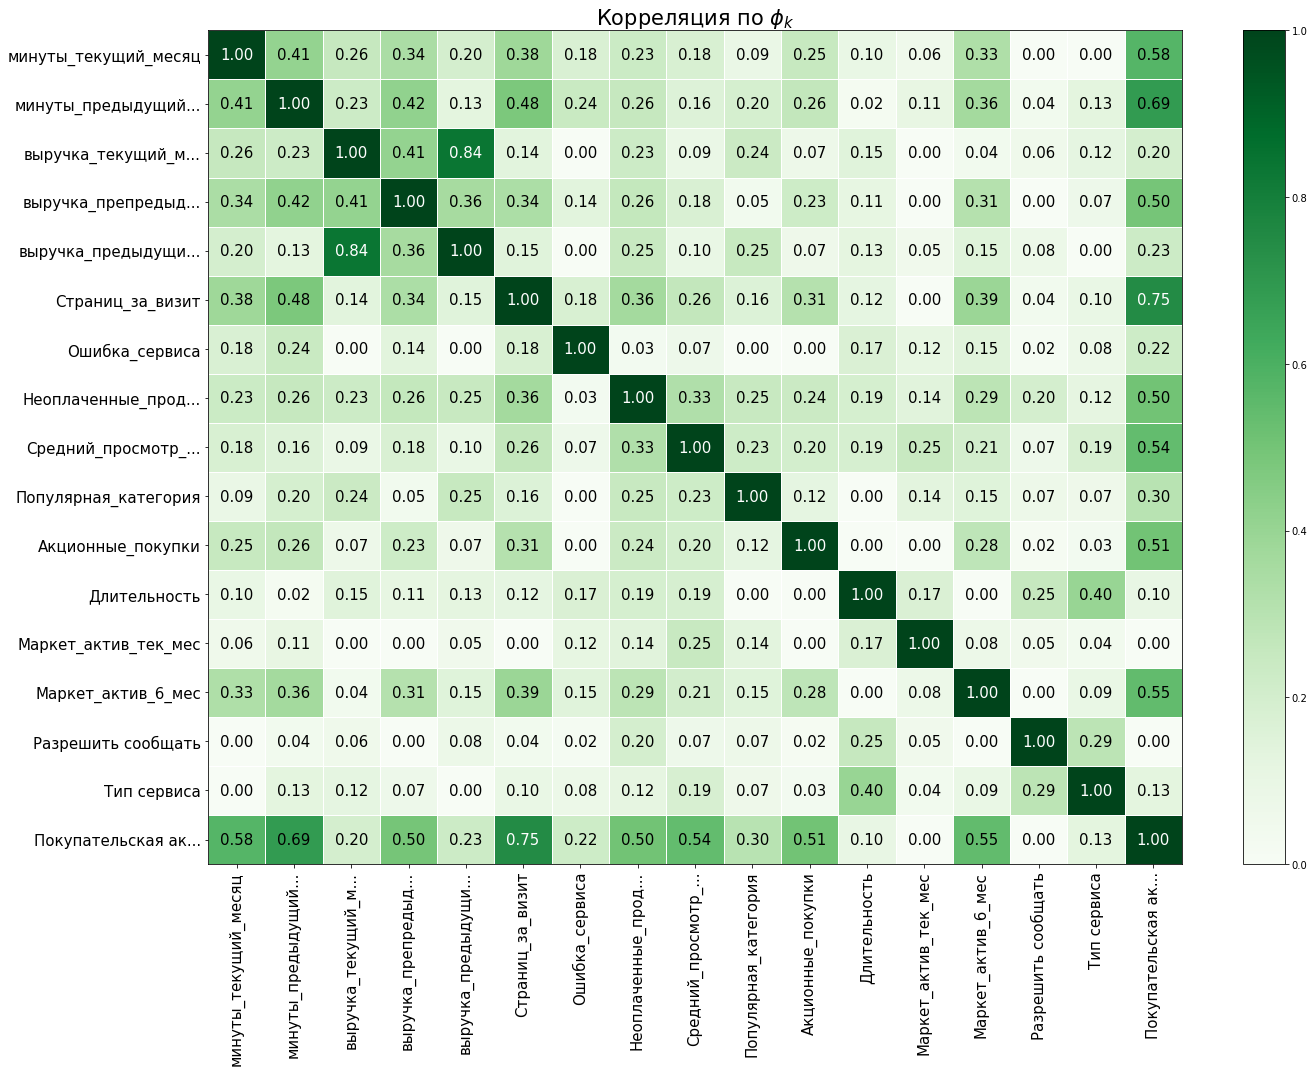

In [24]:
df_corr = df.drop(columns=['id'])
#соберем все численные переменные в датафрейме с помощью функции и сохраним их в переменную
num_columns = df_corr.select_dtypes(include=['float64','int64']).columns.tolist()

phik_matrix = df_corr.phik_matrix(interval_cols=num_columns)

#строим матрицу корреляции Phik
plot_correlation_matrix(phik_matrix.values, 
                       x_labels = phik_matrix.columns,
                       y_labels = phik_matrix.index,
                       vmin = 0, vmax = 1,color_map = 'Greens',
                       title = r'Корреляция по $\phi_k$',
                       fontsize_factor = 1.5, 
                       figsize = (20,15)
                       )



Мы получили очень наглядную матрицу корреляции, на основе которой можно сделать выводы о корреляции с целевым признаком(Покупательская активность) и проверить входные данные на мультиколлинеарность. <br/>
У целевого признака самая большая корреляция наблюдается с такими признаками как: 
* Сколько страниц просмотрено за визит - 0.75
* Минут за предыдущий период - 0.69
* Минуты за текущий месяц - 0.58
* Активность за последние 6 мес - 0.55
* Средний просмотр категорий за визит - 0.54
* Также корреляцию около 0.5 имеют такие факторы как: Неоплаченные продукты в корзине, выручка за предыдущий месяц и Акционные покупки

Мультиколлинеарность между входными признаками замечена не была. <br/>
Мне кажется, что у нас произойдет утечка целевого признака, когда мы попытаемся обучить модель на данных с выручкой. Думаю, стоит удалить данные о выручке для дальнейшего обучения


### Шаг. Использование пайплайнов
#### Создание пайплайна для подготовки данных

In [25]:
# для начала создадим списки для каждого кодирования

#для удобства выведем списки всех численных переменных, созданные ранее с помощью функции
num_columns 

['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'выручка_предыдущий_месяц',
 'выручка_препредыдущий_месяц',
 'выручка_текущий_месяц',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

In [26]:
# и так же варианты значения категориальных
cat_columns = df.select_dtypes(include=['object']).columns.tolist()
for column in cat_columns:
        unique_values = df[column].unique()
        print(f"Уникальные значения для столбца '{column}': {unique_values}")

Уникальные значения для столбца 'Покупательская активность': ['Снизилась' 'Прежний уровень']
Уникальные значения для столбца 'Тип сервиса': ['премиум' 'стандарт']
Уникальные значения для столбца 'Разрешить сообщать': ['да' 'нет']
Уникальные значения для столбца 'Популярная_категория': ['Товары для детей' 'Домашний текстиль' 'Косметика и аксесуары'
 'Кухонная посуда' 'Техника для красоты и здоровья'
 'Мелкая бытовая техника и электроника']


In [27]:
#введем сразу константы и разделим наш датафрейм на тестовую и тренировочную выборки
RANDOM_STATE = 42
TEST_SIZE = 0.25
df = df.dropna()

X_train, X_test, y_train, y_test = train_test_split(
    df.drop(
        [
            'Покупательская активность'
        ], 
        axis=1
    ),
    df['Покупательская активность'],
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = df['Покупательская активность']
)


# признаки для OneHotEncoder
ohe_columns = ['Популярная_категория', 'Разрешить сообщать']

# признаки для OrdinalEncoder
ord_columns = ['Тип сервиса']

# как решили ранее, удалим данные о выручке
num_columns = ['Маркет_актив_6_мес',
 'Маркет_актив_тек_мес',
 'Длительность',
 'Акционные_покупки',
 'Средний_просмотр_категорий_за_визит',
 'Неоплаченные_продукты_штук_квартал',
 'Ошибка_сервиса',
 'Страниц_за_визит',
 'минуты_предыдущий_месяц',
 'минуты_текущий_месяц']

In [28]:
X_testt = X_test.drop('id', axis = 1)
X_train = X_train.drop('id', axis = 1)

In [29]:
# cоздаём пайплайн для подготовки признаков из списка ohe_columns:
ohe_pipe = Pipeline([
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (    'ohe', 
            OneHotEncoder(sparse_output=False, handle_unknown='ignore',drop='first')
        )
])

In [30]:
# cоздаём пайплайн для подготовки признаков из списка ord_columns:
ord_pipe = Pipeline([
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ord',
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум']
                ], 
                handle_unknown='use_encoded_value',
                unknown_value=np.nan
            )
        ),
       (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
])


# создайте общий пайплайн для объединения шагов подготовки данных
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', MinMaxScaler(), num_columns)   
    ], 
    remainder =  'passthrough'
)
print(data_preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['Популярная_категория',
                                  'Разрешить сообщать']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_f...
                                                 ('simpleImputer_after_ord',
                                              

In [31]:
# создаём итоговый пайплайн: подготовка данных и модель
pipe_final= Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

Создадим словарь для каждой модели, в котором укажем гиперпараметры для дальнейшего перебора

In [32]:
param_grid = [
    # словарь для модели DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2,5),
        'models__max_features': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # словарь для модели KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # словарь для модели LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE)],
        'models__C': range(1,5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    # словарь для модели SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability = True)],
        'models__kernel' : ('linear', 'rbf', 'sigmoid'),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']
    }
]


Для дальнейшего анализа моделей было принято решение выбрать метрику ROC-AUC, так как она менее подвержена к дисбалансу классов, который присутствует в некоторых признаках.

In [33]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [34]:
#обучим модель на тренировочной выборке
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['Популярная_категория',
                                                                                'Разрешить '
                                                                                'сообщать']),
                                                                              ('ord',
                                                                               Pipeli...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__kernel': ('linear', 'rbf',
                                                            'sigmoid'),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [35]:
print('Лучшая модель и её параметры:\n\n', randomized_search.best_estimator_)
print ('Метрика лучшей модели на тренировочной выборке:', randomized_search.best_score_)

Лучшая модель и её параметры:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Популярная_категория',
                                                   'Разрешить сообщать']),
                                                 ('ord',
                                 

Так как у нас задача имеет тип классификации, то очень хорошо что лучшей моделью у нас получилась модель Логистической регрессии. Лучшая метрика на тренировочной выборке показала значение 0.89. Осталось проверить то, как модель предскажет значения на тестовой выборке.

In [36]:
# проверим работу модели на тестовой выборке
y_test_pred = randomized_search.predict(X_testt)
y_test_pred
probabilities = randomized_search.predict_proba(X_testt)
probabilities_one = probabilities[:, 1]



In [37]:
#теперь обработаем столбцы с бинарными значениями
y_test_roc = y_test.map(lambda x: 1 if x == 'Снизилась' else 0).astype('int64')
y_test_roc.unique()

array([0, 1])

In [38]:
print(f'Метрика Accuracy на тестовой выборке: {accuracy_score(y_test, y_test_pred)}')
print(f'Метрика Roc_auc на тестовой выборке: {roc_auc_score(y_test_roc, probabilities_one)}')

Метрика Accuracy на тестовой выборке: 0.8919753086419753
Метрика Roc_auc на тестовой выборке: 0.9146139222586256


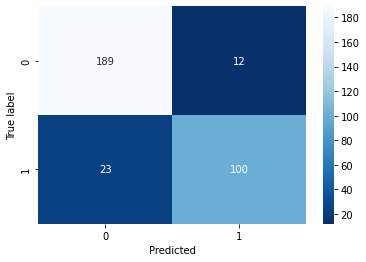

In [39]:
#выведем матрицу ошибок 

cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues_r')
plt.ylabel('True label')
plt.xlabel('Predicted'); 

Матрица ошибок выглядит довольно хорошо. Процент неверных значений довольно мал. Видимо подобраная модель отлично справляется с поставленной задачей. <br/>
Вывод: лучшей моделью для решения нашей задачи классификации будет LogisticRegression с гиперпараметрами C=4, random_state = 42. Использование такой модели дает процент верно определенных параметров - 89%

### Шаг. Анализ важности признаков

Теперь оценим важность признаков для нашей подобраной и построим график важности этих признаков с помощью метода SHAP.

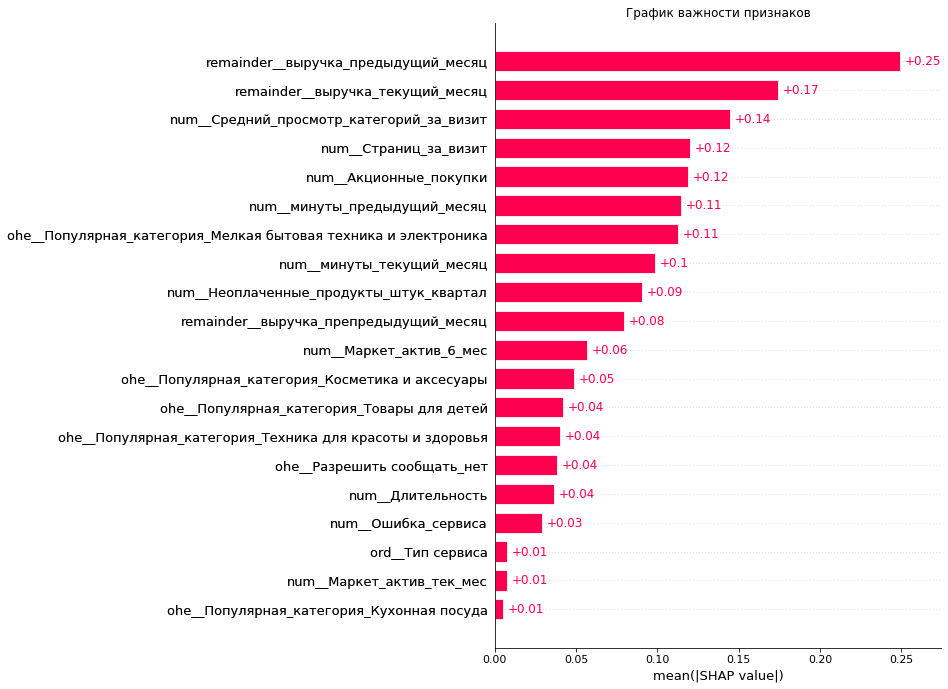

None

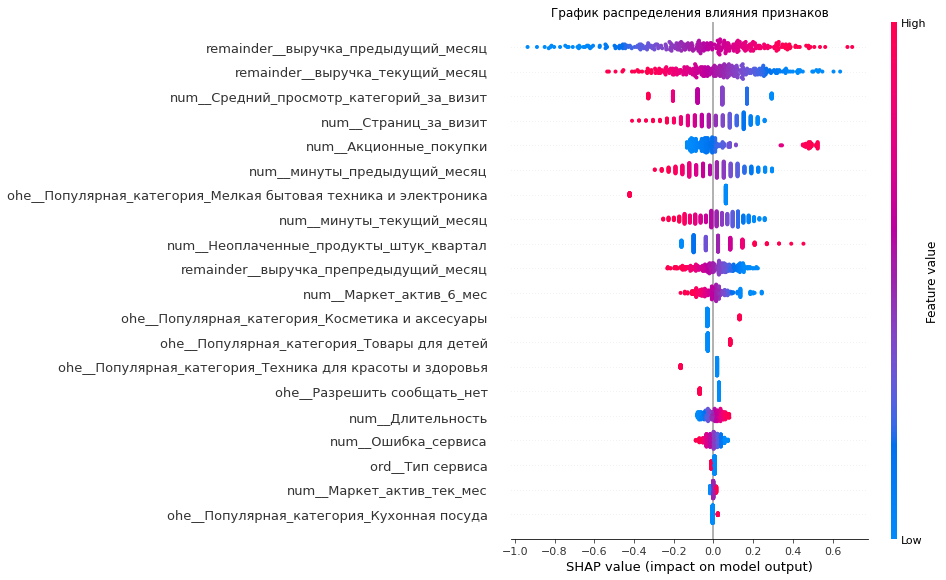

None

In [40]:
X_train_new = pipe_final.named_steps['preprocessor'].fit_transform(X_train)
explainer = shap.LinearExplainer(randomized_search.best_estimator_.named_steps['models'], X_train_new)
X_testt_new = pipe_final.named_steps['preprocessor'].transform(X_testt)
feature_names = pipe_final.named_steps['preprocessor'].get_feature_names_out()

X_testt_new = pd.DataFrame(X_testt_new, columns=feature_names)
shap_values = explainer(X_testt_new)

plt.title('График важности признаков')

display(shap.plots.bar(shap_values, max_display=30))
plt.title('График распределения влияния признаков')
display(shap.plots.beeswarm(shap_values, max_display=30))


Мы получили 2 графика, на которых отображена сила влияния всех признаков в датасете на целевой. Теперь мы можем сделать выводы об их влиянии на показатель 'Покупательская активность'. <br/> <br/>
**Выводы:**
Из всех признаков почти никакого влияния не оказывают 3 категории: Тип сервиса(премиум или стандарт), Количество маркетинговых коммуникаций в текущем месяце и Популярная категория - Кухонная посуда. Их влияние оценивается в 0.1. Можно сказать что они не оказывают на модель совсем никакого влияния. <br/>
Сильнее всего на целевой признак влияют Выручка за текущий и за предыдущий месяц. Их значимость оценивается как 0.25 и 0.17. Как мы уже сделали вывод ранее, эти признаки вызывают утечку целевого признака, так как покупательская активность пользователя это и есть выручка и количество совершенных покупок. При обучении модели и прогнозировании данных на тестовой выборке столбцы с выручкой не учитывались. <br/>
Из оставшихся признаков сильное влияние оказывают: Средний просмотр категорий за визит, количество просмотренных страниц за визит, количество Акционных покупок, минуты активности за предыдущий месяц и если популярная категория - Мелкая бытовая техника и электроника. Значения этих признаков находятся в диапазоне от 0.14 до 0.11. <br/><br/>
При принятии бизнес решений и дальнейшем продумывании маркетинговых ходов можно использовать эти признаки для того чтобы составить портрет потенциального покупателя, которого мы должны чем-то заинтересовать. Действенными будут те решения, которые:
* увеличат количество просмотренных категорий и страниц на сайте за визит 
* расскажут об акционных товарах, либо же создание новых интересных акций для покупателей
* специальные фишки, которые удержат внимание пользователя на сайте как можно дольше
* интересные предложения для любителей Электроники и мелкой бытовой техники

Можно вообще совместить все вместе и например разместить на главной странице раздел с акциями, и на первые строчки выводить акционную Бытовую технику и электронику. А так же сделать приятный интерфейс и интересные механизмы взаимодействия пользователя и интерфейса, для того чтобы на сайте было приятно проводить время и хотелось задержаться подольше, даже просто полистав каталог.



### Шаг. Сегментация покупателей
Для более удобной работы с покупателями можно поделить их на сегменты. Этим мы займемся в этом разделе

In [42]:
#выводы будем делать только по тестовой выборке, 
# так как у нас уже имеется информация полученная методомpredict_proba() для X_testt

# предсказания полученные лучшей моделью
y_test_pred = randomized_search.predict(X_testt)

In [43]:
#добавим в тестовую выборки предсказания модели и вероятности получить класс снижения прибыли
X_test['Предсказания'] = y_test_pred
X_test['Вероятности'] = probabilities_one

#переведем столбец с предсказанными значениями в бинарный вид, где 1 - искомый признак "Снизилась"
X_test['Предсказания'] = X_test['Предсказания'].map(lambda x: 1 if x == 'Снизилась' else 0).astype('int64')
X_test['Предсказания'].unique()

array([0, 1])

In [44]:
#добавим в тестовую выборку данные о прибыли
X_test = pd.merge(X_test, df_money, on = 'id', how = 'left')
X_test

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Предсказания,Вероятности,Прибыль
0,216161,стандарт,да,4.1,4,606,0.15,Техника для красоты и здоровья,6,1,4,12,3973.0,4912.0,3289.2,16,17,0,0.011901,4.69
1,215654,премиум,нет,1.4,4,684,0.94,Товары для детей,3,6,1,6,3548.0,4656.0,4170.7,11,9,1,0.990273,2.75
2,216307,премиум,да,3.3,4,488,0.13,Домашний текстиль,4,2,8,10,5444.0,4565.0,6335.8,20,11,0,0.058413,3.16
3,215501,премиум,да,3.5,3,1057,0.35,Домашний текстиль,4,3,5,6,6604.0,4993.0,6758.7,9,9,1,0.826010,3.74
4,215934,стандарт,нет,5.5,4,147,0.99,Мелкая бытовая техника и электроника,1,2,3,7,5090.0,4451.0,5773.8,15,18,1,0.523646,4.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319,215429,премиум,нет,0.9,4,690,0.24,Домашний текстиль,2,5,7,4,3662.0,4488.0,4158.6,11,10,1,0.944373,3.71
320,216233,премиум,да,3.9,4,1048,0.21,Техника для красоты и здоровья,3,0,6,14,4325.0,4553.0,4257.4,15,17,0,0.040918,4.62
321,215716,стандарт,да,2.4,4,952,0.30,Техника для красоты и здоровья,3,5,2,3,3067.0,4165.0,3343.9,13,14,1,0.864641,4.07
322,216141,стандарт,нет,4.0,4,748,0.28,Косметика и аксесуары,4,0,4,9,5660.5,4885.0,6462.6,14,10,0,0.186600,1.97


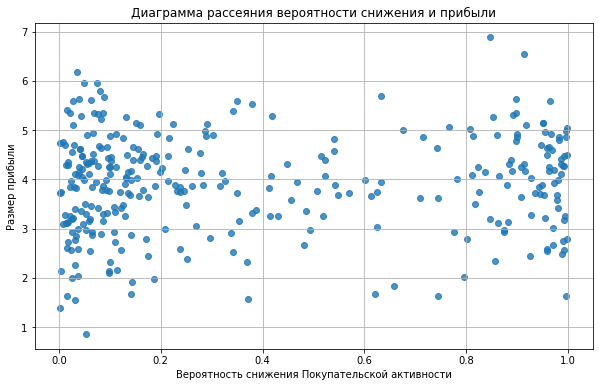

In [45]:
plt.figure(figsize=(10, 6))
plt.scatter(X_test['Вероятности'], X_test['Прибыль'], alpha=0.8)
plt.title('Диаграмма рассеяния вероятности снижения и прибыли')
plt.xlabel('Вероятность снижения Покупательской активности')
plt.ylabel('Размер прибыли')
plt.grid(True)
plt.show()

Данные распределились неоднозначно. Видно, что пользователи, которые находятся в группе риска на снижение активности тоже совершают покупки стоимостью, как у людей с прежней активностью. <br/>
Для рассмотрения хочу взять сегмент с пользователями, которые приносят высокую прибыль, но находятся в зоне риска возможного снижения активности. Границами сегментов возьмем Прибыль > 4, а Вероятность > 0.6

In [46]:
# Фильтрация данных по условиям
df_segment = X_test[(X_test['Прибыль'] > 4) & (X_test['Вероятности'] > 0.6)]

# Вывод полученного сегмента
df_segment

,id,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит,выручка_предыдущий_месяц,выручка_препредыдущий_месяц,выручка_текущий_месяц,минуты_предыдущий_месяц,минуты_текущий_месяц,Предсказания,Вероятности,Прибыль
12,215375,премиум,да,3.0,4,558,0.89,Товары для детей,3,3,7,4,5253.5,4715.0,5633.1,8,9,1,0.973414,4.18
18,215452,стандарт,да,3.8,4,756,0.90,Товары для детей,2,3,6,4,4045.0,4963.0,4206.2,11,10,1,0.959482,4.50
21,215484,премиум,нет,2.9,5,448,0.23,Товары для детей,4,2,6,3,5059.0,4267.0,5018.7,5,7,1,0.898339,5.64
38,215496,премиум,да,4.0,4,684,0.40,Техника для красоты и здоровья,1,6,2,4,5020.0,4896.0,5237.1,11,11,1,0.958938,4.64
47,215666,стандарт,да,3.5,5,703,0.22,Товары для детей,2,2,8,2,4945.0,4138.0,5150.4,6,10,1,0.927290,4.02
48,215737,стандарт,да,0.9,4,225,0.36,Косметика и аксесуары,2,4,2,3,5126.0,4679.0,5291.1,9,10,1,0.982122,4.80
52,215390,стандарт,да,3.1,4,152,0.33,Косметика и аксесуары,6,4,2,5,4254.0,4549.0,4612.8,8,12,1,0.632184,5.70
55,215604,стандарт,нет,3.1,5,458,0.99,Косметика и аксесуары,1,5,3,4,4449.0,4308.0,4459.4,8,10,1,0.996299,4.86
60,215628,стандарт,да,4.0,4,618,0.93,Товары для детей,3,5,2,2,3783.0,4566.0,3848.0,9,10,1,0.986707,4.11
62,215565,стандарт,нет,2.4,4,522,0.99,Кухонная посуда,2,5,4,4,4657.0,4492.0,5104.2,11,12,1,0.987146,4.32


Мы получили наш Сегмент, с покупателями у которых возможно снижение активности, но высокая прибыль. Рассмотрим подробнее их статистику по категориям.

#### Графическое представление выбранного сегмента

In [48]:
df_segment = df_segment.drop(['id'], axis=1)

Выведем графики по тем признакам, которые наша модель признала значимыми при влиянии на целевую переменную и сравним их с теми же графиками для общей выборки.

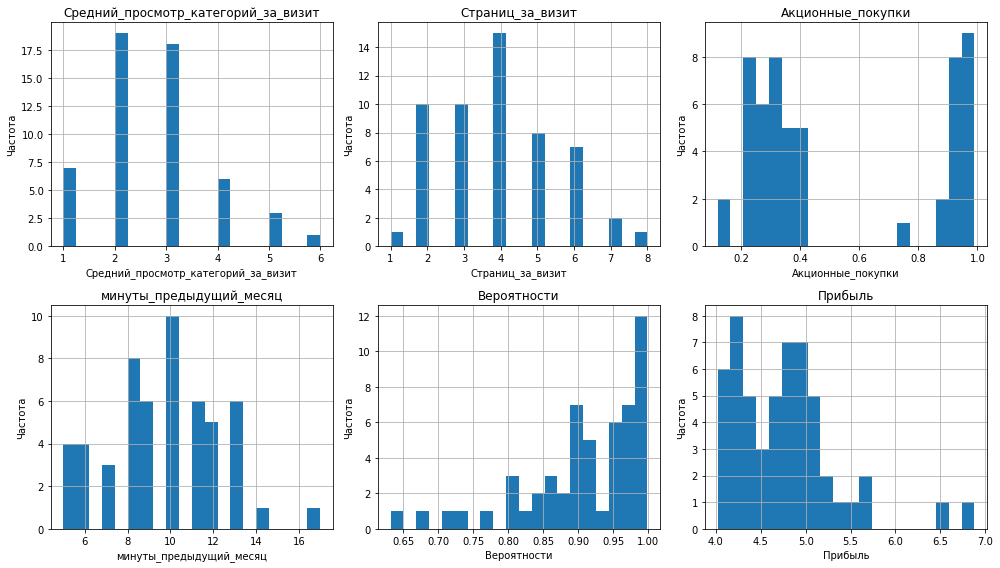

In [53]:
important_values = ['Средний_просмотр_категорий_за_визит', 
                    'Страниц_за_визит', 
                    'Акционные_покупки', 
                    'минуты_предыдущий_месяц',
                    'Популярная_категория', 
                    'Вероятности', 
                    'Прибыль']

df_segment_imp = df_segment[important_values]
num_columns = df_segment_imp.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(14, 8))
for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
        df_segment_imp[column].hist(bins=20)
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

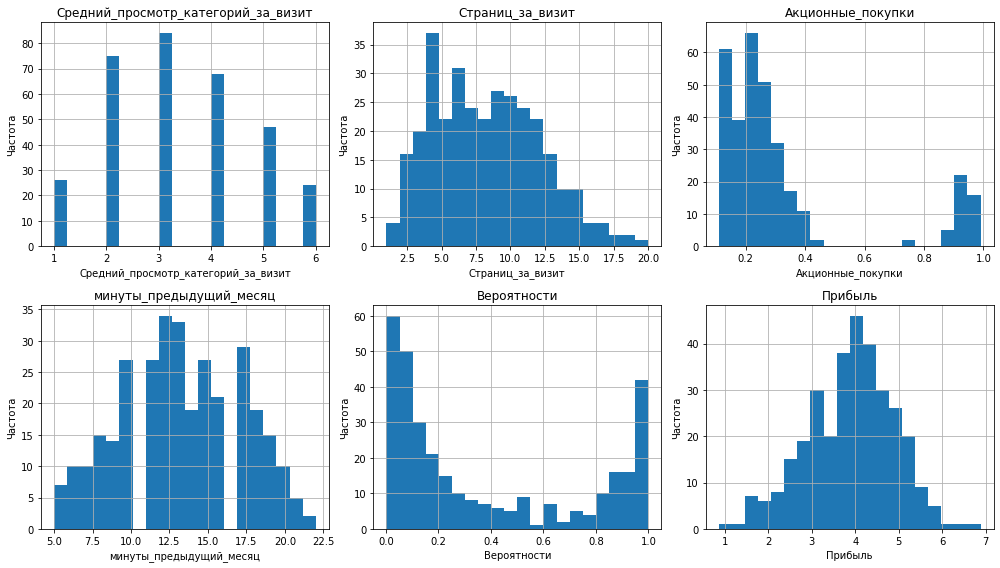

In [54]:
#выведем то же самое для общего датафрейма и сравним
X_test_imp = X_test[important_values]
num_columns = X_test_imp.select_dtypes(include=['float64','int64']).columns.tolist()

plt.figure(figsize=(14, 8))
for i, column in enumerate(num_columns):
    # Создаем subplot для текущего столбца
        plt.subplot(2, 3, i + 1)  # 2 строки, 3 столбца, текущий график
    
    # Строим гистограмму для текущего столбца
        X_test_imp[column].hist(bins=20)
    
    # Добавляем заголовок с названием столбца
        plt.title(column)
    
    # Добавляем метки для осей
        plt.xlabel(column)
        plt.ylabel('Частота')
        
plt.tight_layout()
plt.show()

В целом численные распределения имеют такой же вид, как и у общей выборки(за исключением Прибыли). Также выведем информацию для всех категориальных признаков

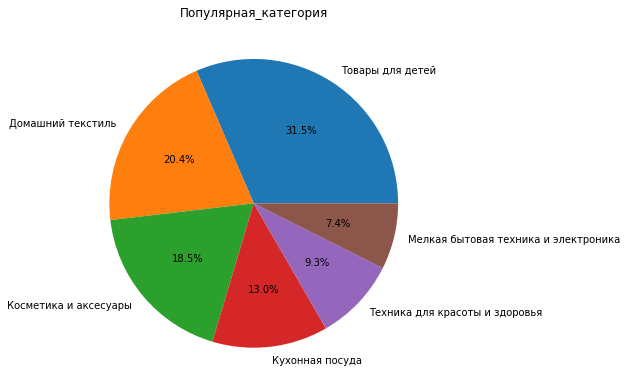

In [57]:
plt.figure(figsize=(14, 10))
    
# Получаем список категориальных столбцов для текущего датафрейма
categorical_columns = df_segment_imp.select_dtypes(include=['object']).columns.tolist()

# Цикл для итерации по каждому категориальному столбцу
for i, column in enumerate(categorical_columns):
        # Создаем subplot для текущего столбца
    plt.subplot(1, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
        # Подсчитываем количество каждого уникального значения в текущем столбце
    data = df_segment_imp[column].value_counts()
    
        # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
        # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы для текущего датафрейма
plt.tight_layout()
plt.show()

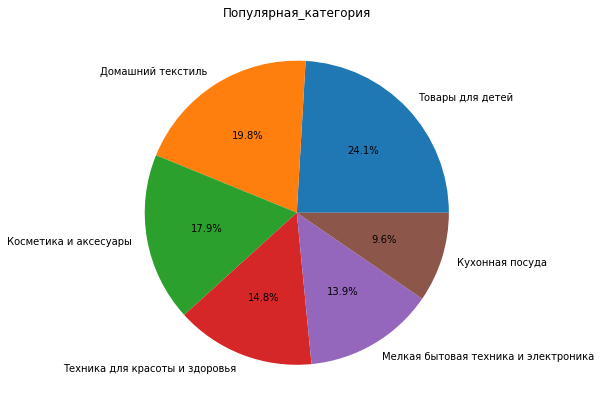

In [58]:
plt.figure(figsize=(14, 10))
    
# Получаем список категориальных столбцов для текущего датафрейма
categorical_columns = X_test_imp.select_dtypes(include=['object']).columns.tolist()

# Цикл для итерации по каждому категориальному столбцу
for i, column in enumerate(categorical_columns):
        # Создаем subplot для текущего столбца
    plt.subplot(1, 2, i + 1)  # 3 строки, 2 столбца, текущий график
    
        # Подсчитываем количество каждого уникального значения в текущем столбце
    data = X_test_imp[column].value_counts()
    
        # Строим круговую диаграмму для текущего столбца
    plt.pie(data, labels=data.index, autopct='%1.1f%%')
    
        # Добавляем заголовок с названием столбца
    plt.title(column)

# Отображаем все круговые диаграммы для текущего датафрейма
plt.tight_layout()
plt.show()

Изучив все графики и сравнив их между собой можно сделать выводы о нашем сегменте, в сравнении с общей выборкой:
* средний просмотр категорий за визит меньше, чем в общей выборке(2 и 3)
* большая популярность акционных товаров
* минуты за предыдущий месяц меньше(10 и 12)
* почти треть пользователей интересуется товарами для детей, что на 7% больше чем в общей выборке

#### Предложение для бизнеса

Учитывая выводы, которые мы получили выше можно прдложить такое решение проблемы: так как целевой признак сильно зависит от времени, которое человек провел на сайте и количества страниц и категорий, которые он открыл, хорошим решением будет разместить на главной странице сайта раздел со скидками и акционными товарами, и так же невербально намекнуть, что там есть товары для детей. Это заинтересует наш сегмент, они зайдут в этот раздел и будут просматривать товары по скидкам, так как этот сегмент любит акции, и скорее всего в поисках нужного проведет довольно много времени на сайте, тем самым мы увеличим вероятность того, что он что-то купит.

#### Выводы по работе с сегментами
Тестовые данные можно было разделить на 4 сегмента:
* Снижение активности и высокая прибыль
* Снижение активности и низкая прибыль
* Прежняя активность и высокая прибыль
* Прежняя активность и низкая прибыль

Я выбрала для рассмотрения сегмент с понижением активности, но высокой прибылью, так как это в инетересах бизнеса - сохранить покупателя, который платежеспособен и уже ранее приносил магазину большую прибыль. Тем более его легче заинтересовать, так как он уже пользовался товарами данного магазина. Я изучила его поведение на сайте и предпочтения по категориям, из чего сделала предположение как привлечь такого покупателя обратно в магазин и "заставить" его покупать больше. 

### Общий вывод

**Поставленная задача:** <br/>
В данной работе нам нужно было решить задачу классификации и предсказать повеледение покупателей в будущем(их покупательсткую активность), учитывая данные которые мы получили в 4 датафреймах, про их предпочтения, поведение на сайте и прибыль за прошлые месяцы. <br/>

**Входные данные:** <br/>
Нам было дано 4 файла:
* датафрейм с данными о поведении покупателя на сайте - market_file.csv
* датафрейм с данными о выручке, которую получает магазин с покупателя - market_money.csv
* датафрейм с данными о времени (в минутах), которое покупатель провёл на сайте в течение периода. - market_time.csv
* датафрейм с данными о среднемесячной прибыли покупателя за последние 3 месяца: какую прибыль получает магазин от продаж каждому покупателю - money.csv

Данные не содержали в себе пропущенных значений и в каждом из файлов была информация о 1300 пользователях. В данных было обнаружено несколько опечаток, которые были исправлены в дальнейшем. Дубликатов найдено не было. В дальнейшем мы объединяли все датафреймы в один, для более удобной работы с данными.<br/><br/>

**Поиск лучшей модели:** <br/>
Поставленную в работе задачу мы решали с помощью машинного обучения, а подбор лучшей модели был реализован с помощью создания Пайплайна, который обрабатывал данные, а потом сам подбирал из предложенных моделей и гиперпараметров ту, которая даст лучший результат и лучший показатель метрики. <br/><br/>
**Лучшая модель:**<br/>
Такой моделью оказалась Логистическая регрессия, с гиперпараметрами random_state = 42, C=4. Обычно для задач классификации модель LogisticRegression подходит отлично, так как она определяет с учетом входных параметров вероятность отношения объекта к одному или другому классу, прямо как в нашей задаче. Показатели итоговых метрик на тренировочной и тестовой выборках получились равными 0.89.<br/><br/>
Самыми весомыми признаками влияния на Покупательскую активность оказывают такие признаки как:
* время проведенное на сайте
* количество просмотренных страниц и категорий
* если у пользователя в любимой категории есть Бытовая техника и электроника

**Разделение пользователей на сегменты:**<br/>
Нами также было проведено разделение покупателей на сегменты, с учетом прибыли, которую они принесли магазину и прогноза об их покупательской активности. Мы выделели 4 сегмента: Снижение активности и высокая прибыль, Снижение активности и низкая прибыль, 
Прежняя активность и высокая прибыль, Прежняя активность и низкая прибыль. Я выбрала сегмент с высокой прибылью и возможным снижением активности. Этот сегмент был рассмотрен подробнее, и были выдвинуты предположительные решения того, как можно увеличить покупательскую активность среди этих пользователей. <br/>
Так как в интересах пользователей данного сегмента очень весомую часть занимали товары для детей, а так же заметен интерес к акционным товарам, выше чем в среднем по общей выборке, было принято решение разместить на главной странице сайта раздел со скидками, и указать что там есть и товары для детей, чтобы привлечь данную категорию людей.
